Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


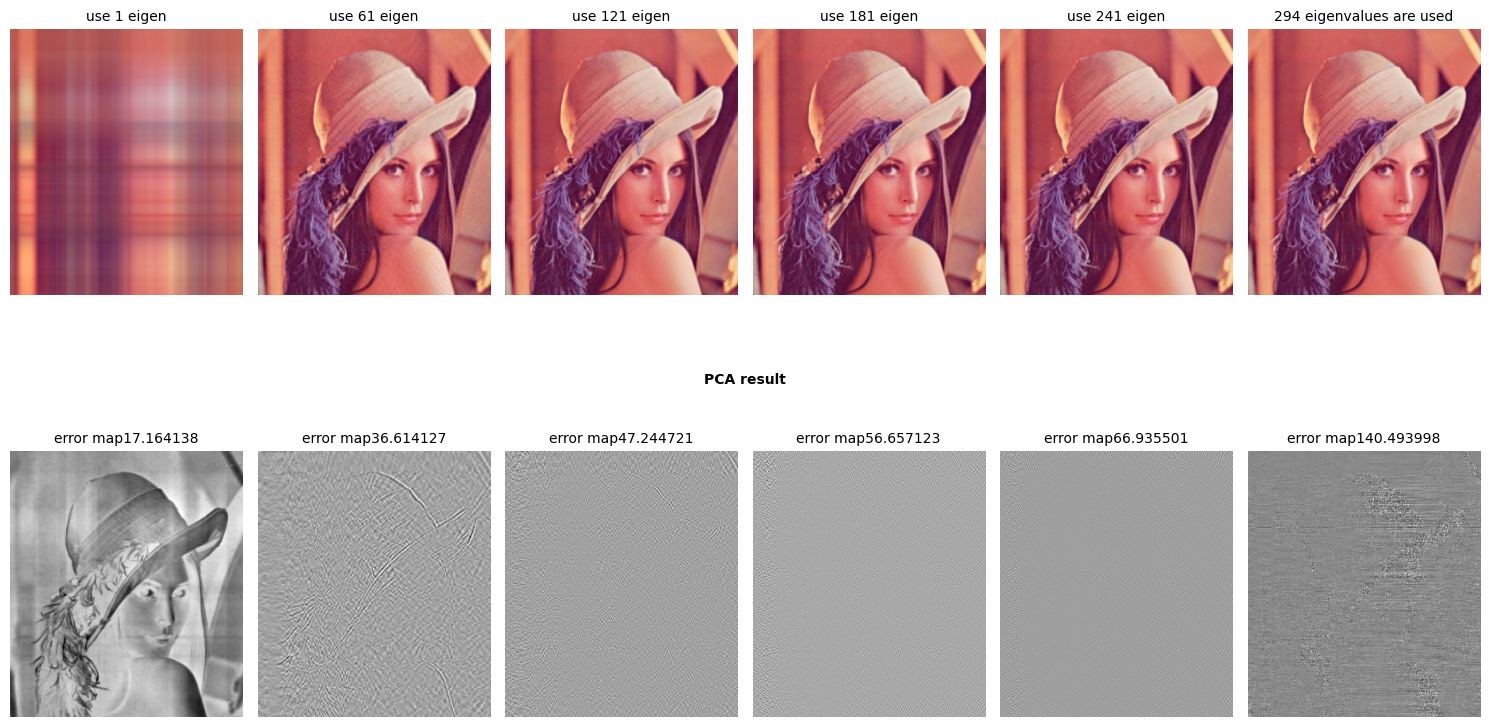

In [1]:
#%% PCA降维
# reference:
#   - https://blog.csdn.net/a10767891/article/details/80288463
#   - http://t.csdn.cn/GmAtB

# 信息量保存能力最大的基向量一定是样本矩阵X的协方差矩阵的特征向量，
# 并且这个特征向量保存的信息量就是它对应的特征值的绝对值。这就解释
# 了为什么PCA算法要利用样本协方差的特征向量矩阵来降维。
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from sklearn.decomposition import PCA
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

img = image.imread("../data/lena_test.png")
img_R, img_G, img_B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

def pca(data, k):
    # 将图像的每一行看成是一个样本，进行归一化
    samples_num, features_num = data.shape
    mean = (data.sum(axis = 1) / samples_num).reshape(-1,1)
    normal_data = data - mean
    
    # 计算协方差矩阵的特征值、特征向量
    cov = normal_data.T @ normal_data
    eigen, eigen_vec = np.linalg.eig(cov)

    #得到最主要的k个特征
    eigen_index = np.argsort(eigen)
    eigen_vec_index = eigen_index[:-(k+1):-1]
    feature = eigen_vec[:, eigen_vec_index]
    
    # 对数据进行降维
    new_data = normal_data @ feature

    # 将降维后的数据映射回原空间
    rec_data = new_data @ feature.T + mean

    rec_data[rec_data > 255] = 255
    rec_data[rec_data < 0] = 0
    return rec_data


def img_pca(img, pca_k):
    R, G, B = [img[:, :, i] for i in range(3)]
    R_new,G_new,B_new = pca(R, pca_k), pca(G, pca_k), pca(B, pca_k)
    img_new = np.stack([R_new, G_new, B_new], axis=2)

    return img_new

def draw_img(ax, img, title, cmap="cool"):
    # blue通道上的误差图
    ax.imshow(img, cmap)
    ax.axis("off")
    ax.set_title(title, size = 10)

nrows, ncols = 2, 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for col in range(ncols):
    pca_k = col * 60 + 1
    if pca_k < img.shape[1]:

        img_new = img_pca(img, pca_k)

        draw_img(axes[0][col], img_new, "use {} eigen".format(pca_k))
        psnr = compare_psnr(img, img_new) 
        error_img = img[:, :, 2] - img_new[:, :, 2]
        draw_img(axes[1][col], error_img, "error map{:3f}".format(psnr), cmap="Greys")
        
       
# 使用全部的PCA
img_new = img_pca(img, img.shape[1])
draw_img(axes[0][5], img_new, "{} eigenvalues are used".format(img.shape[1]))
psnr = compare_psnr(img, img_new) 
error_img = img[:, :, 2] - img_new[:, :, 2]
draw_img(axes[1][5], error_img, "error map{:3f}".format(psnr), cmap="Greys")

plt.tight_layout()
fig.suptitle("PCA result", size = 10, y = 0.5, fontweight = "bold")

plt.show()
